# Project: Investigate a Dataset - [Database_TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> In this project the dataset that is being investigated is the TMDb Movie dataset which has over 10000 movies with release dates dating from 1960 to 2015.<br> Here is a list of the columns that are provided in the dataset:<br>
**id** is the unique identity of a movie<br>
**imdb_id** is the unique identity of a movie which is used by IMDB<br>
**popularity** shows the popularity of a movie<br>
**budget** is the amount of money that was used to make the movie at the time it was released<br>
**revenue** is the amount of money that was made from the movie at the time when it was released<br>
**original_title** is the name of the movie when it was released<br>
**cast** is the list of actors who featured in the movie<br>
**homepage** is the website for the movie<br>
**director** is the director of the movie<br>
**tagline** is the popular phrase from the movie<br>
**keywords** are words to describe the movie which makes searching for it easier<br>
**overview** is a description of what the movie is about<br>
**runtime** is the duration of the movie<br>
**genre** is the type of the movie<br>
**production_companies** are the companies that were responsible for producing the movie<br>
**release_date** is the date that the movie was released<br>
**vote_count** is the number of votes provided for each movie<br>
**vote_average** is the average rating of the movie based on the votes<br>
**release_year** is the year that the movie was released<br>
**budget_adj** is the budget amount adjusted to reflect inflation<br>
**revenue_adj** is the revenue amount adjusted to reflect inflation<br>


### Question(s) for Analysis
>The questions that are investigated in this project are<br>
1. Investigating the trend in popularity of movies as the time progresses from 1960 to 2015
2. Investigating the correlation of popularity, budget, vote count with the revenue

*The libraries used in the project were imported*

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
> The dataset is loaded into the Jupyter Notebook and checks are done to see if the dataset does not contain any missing values, upon checking it is discovered that there are variables with missing values. It is decided that all the missing values should be dropped so that all the variables have the same number of data points. Columns that were initially thought to not b useful in the investigation were dropped. The release date was converted to datetime so that it can be used to plot a time series to show the trend of some of the variables as time progresses. The dataframe was sorted in asscending order using the release date as the key, this made it easier to plot time series graphs.

### General Properties
> Comments were placed before each cell using markdown to explain the step that was being done in that cell.

*The dataset was loaded into the Jupyter Notebook and a few rows were displayed*

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


*Displaying the dataframe information to know whether there are any missing values and the data types for the variables*

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> All the cells have comments written before them to explain what was being done in that cell
 

*Dropping the columns that were deemed to be useless for the investigation being done on the dataset*

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_updated = movies.drop(columns=['original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
                                     'genres', 'production_companies'])
movies_updated.head(5)

,id,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


*Reformatting the release date column so that it would make it easy to convert it datetime*

In [6]:
movies_updated['release_date'] = movies_updated['release_year'].astype(str) + '-' + movies_updated['release_date'].str.split('/', expand=True)[0]+'-'+ movies_updated['release_date'].str.split('/', expand=True)[1]
movies_updated.head(5)

,id,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,124,2015-6-9,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,120,2015-5-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,119,2015-3-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,137,2015-4-1,2947,7.3,2015,1.747999e+08,1.385749e+09


*Converting the release date from string to datetime*

In [7]:
movies_updated['release_date'] = pd.to_datetime(movies_updated['release_date'], format='%Y/%m/%d')
movies_updated.head(5)

,id,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


*Dropping rows with missing values in the dataframe and checking whther the columns have the same number of rows*

In [8]:
movies_updated_clean = movies_updated.dropna()
movies_updated_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 12 columns):
id              10856 non-null int64
imdb_id         10856 non-null object
popularity      10856 non-null float64
budget          10856 non-null int64
revenue         10856 non-null int64
runtime         10856 non-null int64
release_date    10856 non-null datetime64[ns]
vote_count      10856 non-null int64
vote_average    10856 non-null float64
release_year    10856 non-null int64
budget_adj      10856 non-null float64
revenue_adj     10856 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 1.1+ MB


*Checking whether all the missing values have been dropped*

In [9]:
movies_updated_clean.dropna().isna().sum()

id              0
imdb_id         0
popularity      0
budget          0
revenue         0
runtime         0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

*Sorting the dataframe using the release date column in ascending order*

In [10]:
movies_sorted = movies_updated_clean.sort_values(by=['release_date'])
movies_sorted.head(5)

,id,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10150,6643,tt0054428,0.421043,0,0,125,1960-01-01,17,4.9,1960,0.0,0.0
10152,23220,tt0053677,0.333643,0,0,85,1960-01-01,19,6.6,1960,0.0,0.0
10162,18780,tt0054310,0.194948,0,0,97,1960-02-11,12,4.9,1960,0.0,0.0
10166,21240,tt0053699,0.136525,0,0,86,1960-02-22,10,6.0,1960,0.0,0.0
10156,1673,tt0053729,0.267118,0,0,73,1960-03-01,12,6.5,1960,0.0,0.0


*Resetting the index and droping the index column*

In [11]:
movies_sorted.reset_index(inplace=True)
movies_sorted.drop(columns=['index'], inplace=True)
movies_sorted.head(5)

,id,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,6643,tt0054428,0.421043,0,0,125,1960-01-01,17,4.9,1960,0.0,0.0
1,23220,tt0053677,0.333643,0,0,85,1960-01-01,19,6.6,1960,0.0,0.0
2,18780,tt0054310,0.194948,0,0,97,1960-02-11,12,4.9,1960,0.0,0.0
3,21240,tt0053699,0.136525,0,0,86,1960-02-22,10,6.0,1960,0.0,0.0
4,1673,tt0053729,0.267118,0,0,73,1960-03-01,12,6.5,1960,0.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis

> Statistics were computed and visualizations were created with the goal of addressing the research questions in the Introduction section. In this case time series plots and scatter plots were created to answer the research questions.


### Research Question 1 (Investigating the revenue of movies as the time progresses)

*The question being investigated can help to determine whether movies that were being produced over the years from 1960 to 2015<br> have increased in popularity thereby demonstrating for example how effective trailers have been in popularizing movies.<br> In order to investigate whether there is an increase in popularity, a time series for popularity was plotted.<br>
This was further confirmed by splitting the data into two halves and each half was used to calculate statistics such as mean.<br> In this case the second half of the data had a higher mean than the first half of the data further supporting the fact<br> that the movies became more popular as time progressed. The average popularity for each year was calculated and a plot of<br> average popularity against time was plotted which also supported the observation that popularity increased over time.*

*A function is used to plot all the histograms in order to reduce the repetitions and to simplify the code*

In [12]:
def plot_hist(x):
    plt.figure(figsize=(10,8))
    movies_sorted[x].hist();
    plt.title('Histogram of {}'.format(x))
    plt.xlabel(x)
    plt.ylabel('frequncy')
    plt.tight_layout()
    return  

*A function used to plot all the scatter plots in order to reduce the repetitions and to simplify the code*

In [13]:
def plot_scatter(x,y):
    plt.figure(figsize=(10,8))
    plt.scatter(movies_sorted[x], movies_sorted[y], s=15, alpha=0.3)
    plt.title('Scatter plot of {} against {}'.format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    return

*Creating a time series plot of popularity*

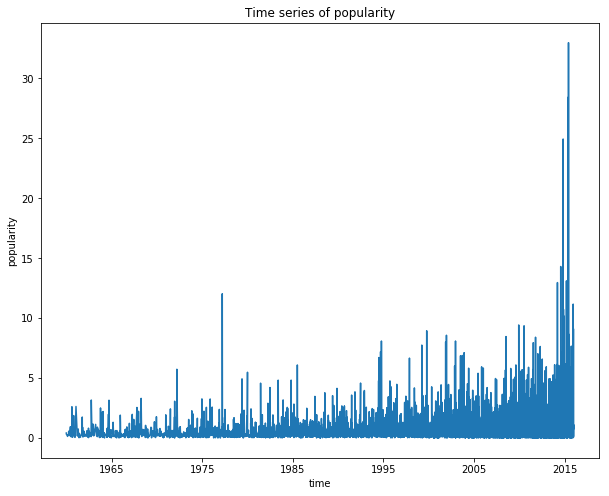

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#movies_updated_clean.plot(x='release_date', y='revenue', kind='scatter');
plt.figure(figsize=(10,8))
plt.plot(movies_sorted['release_date'], movies_sorted['popularity'])
plt.title('Time series of popularity')
plt.xlabel('time')
plt.ylabel('popularity')
plt.show()

*The graph above shows the time series for popularity and it can be seen that the general trend is that the popularity is increasing over the years* 

*Averaging the popularity for each year and plotting a graph of average popularity against time*

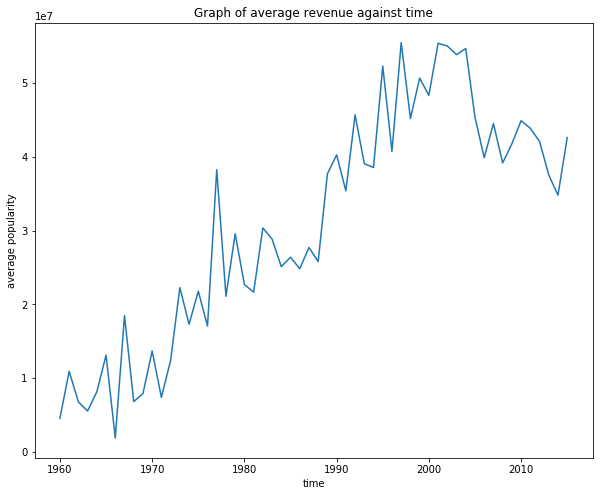

In [15]:
plt.figure(figsize=(10,8))
movies_sorted.groupby(['release_year']).mean()['revenue'].plot()
plt.title('Graph of average revenue against time')
plt.xlabel('time')
plt.ylabel('average popularity')
plt.show()

*The graph above shows average popularity against time and the general trend is that average popularity is increasing over time<br> which also supports the observation that there is an increase in popularity over the years.*

*Creating a histogram for popularity*

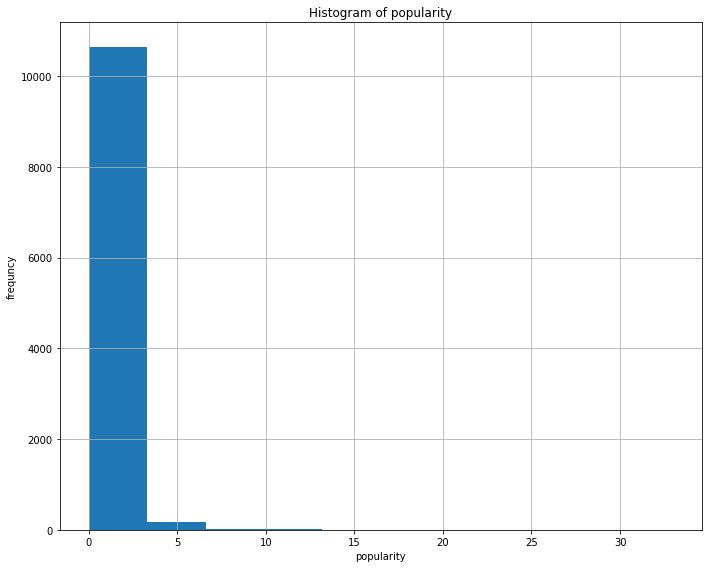

In [16]:
plot_hist('popularity')

*A histogram for popularity was plotted to understand the distribution of the data and it can be seen that most of the<br> 
values are between 0 and 3 which explains why the mean value for popularity is very low.*

*Computing the summary statistics for popularity from 1960 to 3 February 2006 which is the first half of the dataset*

In [17]:
movies_sorted.query('release_date <= "2006-02-03"')['popularity'].describe()

count    5428.000000
mean        0.590964
std         0.726670
min         0.000065
25%         0.214497
50%         0.384271
75%         0.683500
max        12.037933
Name: popularity, dtype: float64

*The describe function was used to the summary statistics for the first half of the dataframe and <br> 
it was observed that the mean value is small as compared to the second half of the data.*

*Computing the summary statistics for popularity after 3 February 2006 which is the second half of the dataset*

In [18]:
movies_sorted.query('release_date > "2006-02-03"')['popularity'].describe()

count    5428.000000
mean        0.702691
std         1.211641
min         0.000620
25%         0.198780
50%         0.383723
75%         0.759767
max        32.985763
Name: popularity, dtype: float64

*The describe function was used to the summary statistics for the second half of the dataframe and it was observed <br>
that the mean value is greater as compared to the first half of the data which confirms that popularity increases with time.*

### Research Question 2 (Investigating if there is a correlation between the budget, vote count and popularity with the revenue)

*The investigation to determine the correlation between budget, vote count and popularity with the revenue was to determine<br>
how these 3 independent variables can be good predictors of revenue, which means when these independent variables increase<br> 
then revenue also increases. It can be observed that all 4 variables have the similar distributions which could be the reason<br>
why the independent variables are directly proportional to the revenue. The scatter plots confirm that there is an almost <br>
relationship between the independent variables and the revenue. Lastly the correlation between the 3 independent variables <br>
and the revenue is a strong positive correlation. This further affirms that there is an almost linear relationship between <br>
the 3 independent variables and the revenue.*


*Creating a histogram for budget*

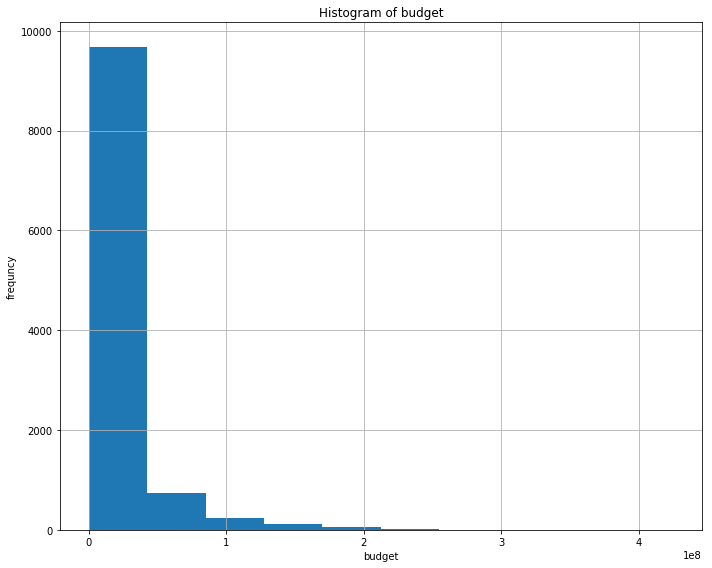

In [19]:
plot_hist('budget')

*The histogram above was plotted to investigate the distribution of the budget as well as to compare it to other variables*

*Creating a histogram for popularity*

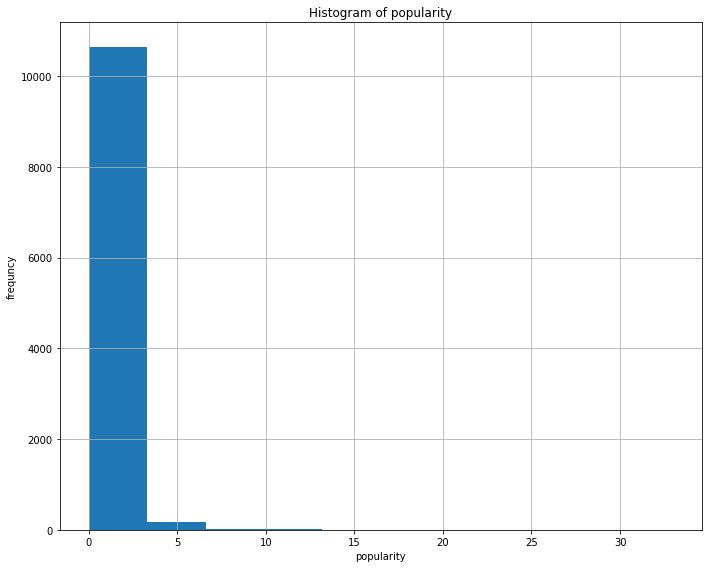

In [20]:
plot_hist('popularity')

*The histogram above was plotted to investigate the distribution of the popularity as well as to compare it to other variables*

*Creating a histogram for revenue*

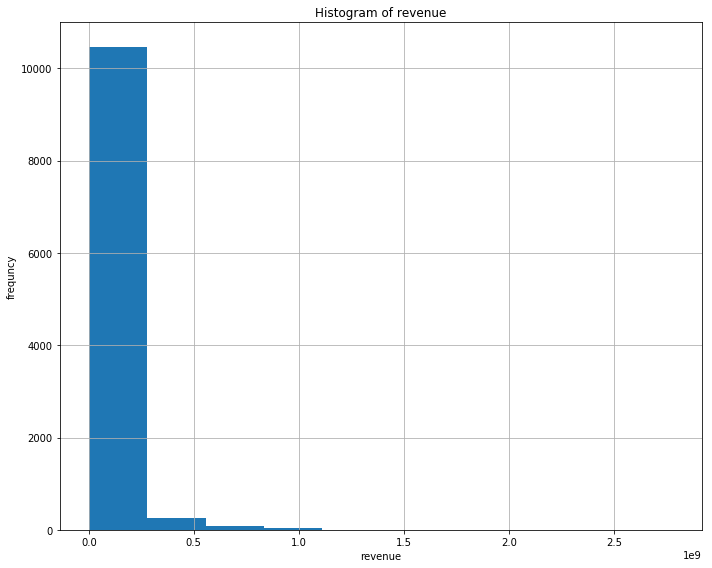

In [21]:
plot_hist('revenue')

*The histogram above was plotted to investigate the distribution of the revenue as well as to compare it to other variables*

*Creating a histogram for vote count*

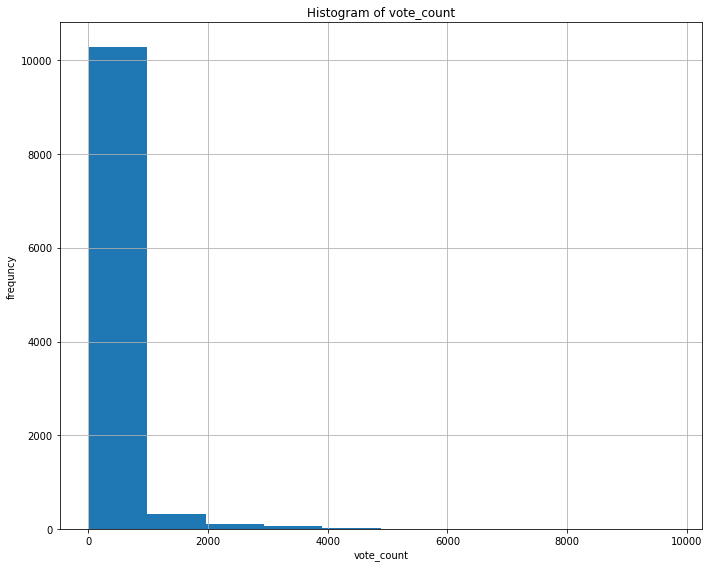

In [22]:
plot_hist('vote_count')

*The histogram above was plotted to investigate the distribution of the vote count as well as to compare it to other <br> 
variables. After all the plots were done it was discovered that all the variables are right skewed which could be the <br> 
reason why the 3 independent variables are directly proportional to the revenue*

*Plotting the scatter plot for revenue against budget*

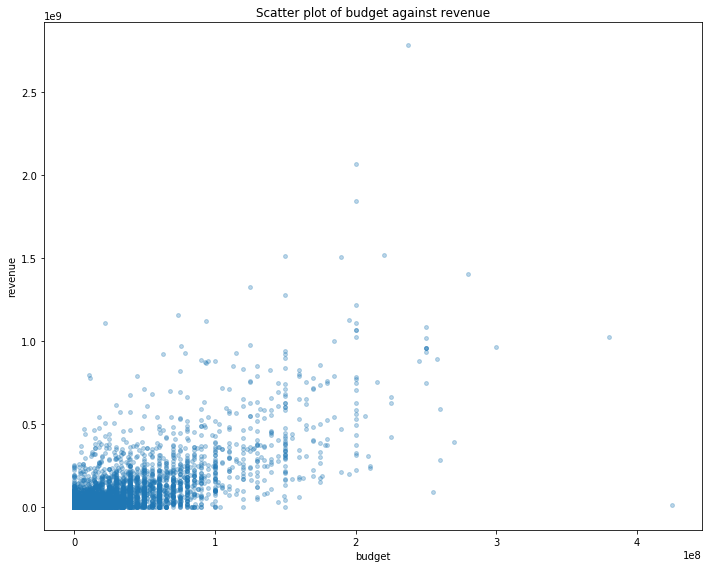

In [23]:
plot_scatter('budget', 'revenue')

*It can be seen that there is a positive linear relationship between budget and revenue with a few outliers. This shows <br>
that budget is directly proportional to revenue.*

*Plotting the scatter plot for revenue against vote count*

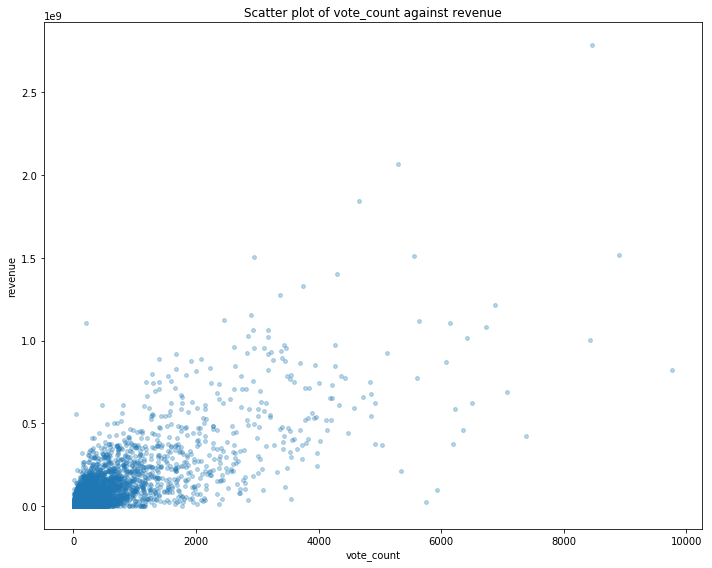

In [24]:
plot_scatter('vote_count', 'revenue')

*It can be seen that there is a positive linear relationship between vote count and revenue with a few outliers. This shows
that vote count is directly proportional to revenue.*

*Plotting the scatter plot for revenue against popularity*

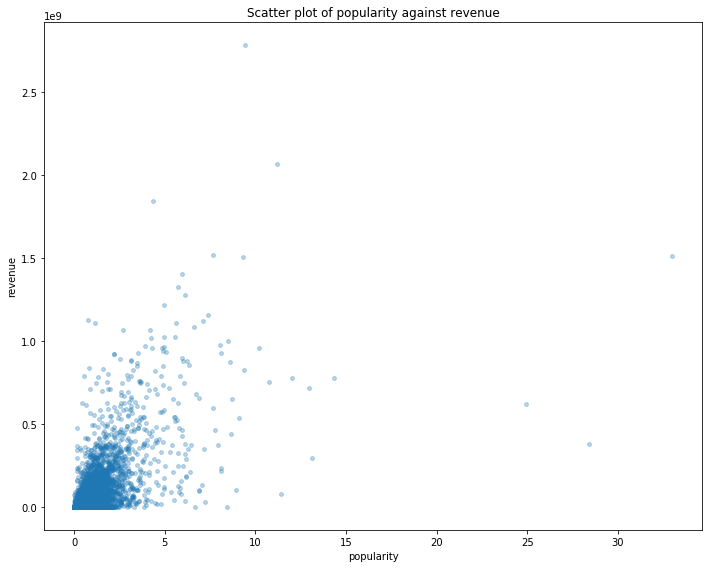

In [25]:
plot_scatter('popularity', 'revenue')

*It can be seen that there is a positive linear relationship between popularity and revenue with a few outliers. This shows <br>
that popularity is directly proportional to revenue. Hence, all 3 independent variables can be good predictors for revenue <br>
which implies that increasing the popularity, budget and / or vote count might in turn increase the revenue.*

*Computing the correlation for budget, popularity and vote count with revenue*

In [26]:
movies_sorted.corr()['revenue'][['budget', 'vote_count', 'popularity']]

budget        0.734867
vote_count    0.791152
popularity    0.663329
Name: revenue, dtype: float64

*The correlation values between the 3 independent variables and the revenue is further evidence that there is a linear <br>
relationship between those variables and the revenue. Since the values are all positive, it shows that the 3 independent <br>
variables are directly proportional to revenue.*

<a id='conclusions'></a>
## Conclusions

### Investigating the popularity of movies as the time progresses
> In the time series that was plotted for popularity, it can be seen that the popularity generally increases as the time progresses from 1960 to 2015. Further investigation was done to check whether popularity increases as time progresses. This was done by averaging the popularity for each year using the groupby function. It was seen that the plot that was done further supports the observation that was made on the time series that popularity increases as the time progresses. A histogram was plotted to check the distribution of the popularity and it was seen that the popularity data is right skewed and most of the values are found below the popularity rating of 10. In this case it implies that the popularity is not normally distributed. Lastly the dataframe was divided into two equal halves to compare the summary statistics for each of the halves. It was noticed that the second half which are data points from 2006 to 2015 had a higher mean value as compared to the first half of the dataframe which contains values from 1960 to 2006. This also shows that the popularity of movies increased over time. Further investigations can be done to check the popularity of movies on a monthly bases for example to know which month of the year had the highest popularity. This investigation has a limit in that only two variables which are release date and popularity were used, more insights could have been inferred if the variables used were increased in number. 

### Investigating if there is a correlation between the budget, vote count and popularity with the revenue
> Firstly, histograms of the 4 variables that are under investigation were plotted on the same figure and it shows that all the variables have the same distribution which is right skewed. Most of the values are concentrated on the left side of the plot and this makes all the histograms to not be normally distributed. To accurately check whether the distributions are actually similar, all the variables would need to be normalized which is something additional that can be done. As a result the histograms obtained do not accurately confirm that the distributions of all the variables are the same. Revenue was taken as the dependent variable and scatter plots were plotted with the three other variables as the independent variables. This was done to check whether there was any relationship between the 3 variables and the revenue. The 3 variables were namely: budget, vote count and popularity. All the scatter plots obtained show that revenue is generally directly proportional to the 3 other variables. The corr function was used to determine the correlation of the 3 variables to the revenue and the values obtained show a strong postive correlation. Additional research can be done to investigate whether adjusted values would yield the same results as values which are not adjusted. It would have been helpful if the figures had been adjusted using the inflation in 2015 instead of the year 2010, which would have made the figures used to be more current. Limitations of this investigation is that no statistical tests were performed to support the deductions that were made.


## Submitting your Project 

> An html version of this notebook was created using the code in the last cell of the notebook



In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0